# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

In this lab you will: 

- Use ANOVA for testing multiple pairwise comparisons 
- Interpret results of an ANOVA and compare them to a t-test

## Load the data

Start by loading in the data stored in the file `'ToothGrowth.csv'`: 

In [1]:
# Your code here
import pandas as pd
df= pd.read_csv('ToothGrowth.csv')

In [3]:
df.head()


,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


## Generate the ANOVA table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage:  

In [4]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [6]:
df['supp'].unique()

array(['VC', 'OJ'], dtype=object)

In [12]:
df['dose'].unique()

array([0.5, 1. , 2. ])

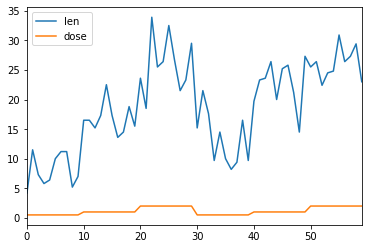

In [16]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [11]:
df.head(2)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5


In [18]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'len ~ C(supp) + C(dose)' # 'supp' and 'dose' are categorical variables
lm = ols(formula,df).fit()  # create a model from a formula and a data frame
# OLS stands for Ordinary Least Square
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     59.88
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.78e-17
Time:                        17:59:02   Log-Likelihood:                -163.60
No. Observations:                  60   AIC:                             335.2
Df Residuals:                      56   BIC:                             343.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4550      0.988     12.

R-squared:  percentage of the variation in dependent variable that is explained by independent variables
Adj. R-squared: R-squared adjusted for the number of variables in the regression

Prob (F-statistic): null hypothesis = “all the regression coefficients are equal to zero”. 
                    Prob(F-statistics) = probability of null hypothesis being true.
Log-Likelihood:
AIC:   Akaike’s Information Criteria. A lower AIC implies a better model
BIC:   Bayesian Information Criteria. Penalties are more severe than for AIC

Prob(Omnibus): null hypothesis for OLS = errors are normally distributed = assumption of OLS
                Prob(Omnibus) close to 1 = null hypothesis is true => Best Linear Unbiased Estimators (BLUE)
                Here, null hypothesis is not true (0.164) => not BLUE
                
Prob(Jarque-Bera): in line with the Omnibus test. A large (?) value of JB test means the errors are not normally distributed                
Durbin-Watson: tests another assumption of OLS: homoscedasticity i.e. variance of error terms is constant and does not depend
                on the x-value. Value between 1 and 2 = good
                


In [19]:
table= sm.stats.anova_lm(lm,typ=2)
print(table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


## Interpret the output

Make a brief comment regarding the statistics and the effect of supplement and dosage on tooth length: 

In [ ]:
# Your comment here
# Both dose and supplement type are impactful. At first glance, dosage seems to be the more impactful of the two.

## Compare to t-tests

Now that you've had a chance to generate an ANOVA table, its interesting to compare the results to those from the t-tests you were working with earlier. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterward, you'll conduct a t-test to compare the tooth length of these two different samples: 

In [ ]:
# Your code here

Now run a t-test between these two groups and print the associated two-sided p-value: 

In [ ]:
# Calculate the 2-sided p-value for a t-test comparing the two supplement groups


## A 2-Category ANOVA F-test is equivalent to a 2-tailed t-test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [ ]:
# Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
# Compare the p-value to that of the t-test above. 
# They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)

## Run multiple t-tests

While the 2-category ANOVA test is identical to a 2-tailed t-test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [7]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2-sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [ ]:
# Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
# for all combinations of the supplement-dose groups listed above. 
# (Since there isn't a control group, compare each group to every other group.)

## Summary

In this lesson, you implemented the ANOVA technique to generalize testing methods to multiple groups and factors.